<h1> Introduction </h1><br>
In this notebook we are comparing ulnar deviation and radial devation movement classes using the signals from channel1. We shall be comparing ulnar deviation of person 5 and radial deviation of person 8 based on features we defined.

Let's import the necessary libraries paths and dictionaries.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import tsfel
import os
import json
import matplotlib.pyplot as plt
from EmgFilter import EMG_Filter

In [2]:
#setting up paths for features
module_path = os.path.join(os.getcwd(),'features.py') 
json_path = os.path.join(os.getcwd(),'features.json')

In [3]:
#loading required tsfel features dictionary from our customised json file
with open('feat_dict1.json', mode='rt') as f:
    dict_feact = json.load(f)

In [4]:
#loading custom feaures dictionary that we implemented 
feat_dict = tsfel.get_features_by_domain('temporal', json_path)

In [5]:
#merging two dictionaries
feat_dict.update(dict_feact)

Now let's select the desired data into dataframes from our EMG dataset.

In [6]:
#building copies of dataframe for person 5 and person 8 respectively
DataFrame= pd.read_csv('EMG-data.csv')
DF_1 = DataFrame[DataFrame.label==5].copy()
DF_1.rename(columns={'class':'group'}, inplace=True) 
DF_2 = DataFrame[DataFrame.label==8].copy()
DF_2.rename(columns={'class':'group'}, inplace=True) 

In [7]:
#selecting desired classes of each person ie class 5 for person 5 and class 6 for person 8
#here class 5 represents ulnar deviation and class 6 represents radial deviation
DF1 = DF_1[DF_1.group==5].copy()
DF2 = DF_2[DF_2.group==6].copy()

In [8]:
#selecting signals from channel1
DF1 = DF1[['channel1']].copy()
DF2 = DF2[['channel1']].copy()

Our signal from channel 1 are ready in dataframes. Now lets filter the signals before extracting the features.

In [9]:
DF1_f = EMG_Filter(DF1,high_band=30, low_band=450, n_channels = 1) #filtering the signals between 30Hz and 450 Hz.
DF2_f = EMG_Filter(DF2,high_band=30, low_band=450, n_channels = 1) #filtering the signals between 30Hz and 450 Hz.

In [10]:
DF1_f.rename(columns={'channel1':'group5_channel1'},inplace=True)
DF2_f.rename(columns={'channel1':'group6_channel1'}, inplace = True)

In [11]:
df = pd.merge(DF1_f.reset_index(),DF2_f.reset_index())
df = df[['group5_channel1','group6_channel1']]

In [12]:
df

group5_channel1  group6_channel1
0       -4.230041e-08        -0.000003
1        1.094375e-05        -0.000002
2        6.869308e-06         0.000230
3       -6.477328e-06        -0.000022
4       -6.645519e-06        -0.000004
...               ...              ...
6093    -9.713068e-07        -0.000080
6094     1.716302e-07        -0.000110
6095    -7.019721e-09        -0.000124
6096     4.468421e-07        -0.000161
6097     3.308670e-07        -0.000174

[6098 rows x 2 columns]

Now the signlas are filtered. Lets calculate the features.

In [13]:
#Features for ulnar deviation of person 5
Features = tsfel.time_series_features_extractor(feat_dict, df, fs=1000, window_spliter = True, window_size=50, features_path =module_path)

*** Feature extraction started ***



*** Feature extraction finished ***


In [14]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   0_Histogram_0         121 non-null    float64
 1   0_Histogram_1         121 non-null    float64
 2   0_IAV                 121 non-null    float64
 3   0_LPCC_0              121 non-null    float64
 4   0_LPCC_1              121 non-null    float64
 5   0_MAV                 121 non-null    float64
 6   0_MFCC_0              121 non-null    float64
 7   0_RMS                 121 non-null    float64
 8   0_SSI                 121 non-null    float64
 9   0_Slope               121 non-null    float64
 10  0_Spectral slope      121 non-null    float64
 11  0_VAR                 121 non-null    float64
 12  0_Zero crossing rate  121 non-null    float64
 13  1_Histogram_0         121 non-null    float64
 14  1_Histogram_1         121 non-null    float64
 15  1_IAV                 1

Now lets plot the features to make comparisons among ulnar deviation and radial deviation.

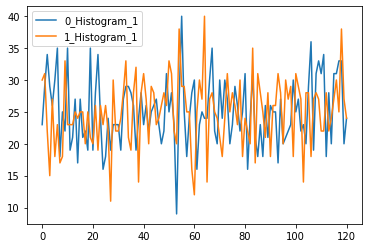

In [15]:
#Histogram
Features.plot(y=['0_Histogram_0', '1_Histogram_0'])
plt.suptitle('Label5 Class5 histogram vs Label8 Class6 histogram', fontsize=16)
Features.plot(y=['0_Histogram_1', '1_Histogram_1'])

Text(0.5, 0.98, 'Label5 Class5 SSI vs Label8 Class6 SSI')

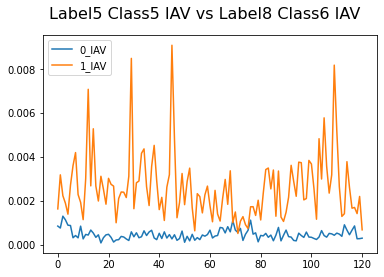

In [16]:
#IAV and SSI
Features.plot(y= ['0_IAV', '1_IAV'])
plt.suptitle('Label5 Class5 IAV vs Label8 Class6 IAV', fontsize=16)
Features.plot(y= ['0_SSI','1_SSI'])
plt.suptitle('Label5 Class5 SSI vs Label8 Class6 SSI', fontsize=16)

In [17]:
#LPCC
Features.plot(y=['0_LPCC_0', '1_LPCC_0'])
plt.suptitle('Label5 Class5 LPCC vs Label8 Class6 LPCC', fontsize=16)
Features.plot(y=['0_LPCC_1', '1_LPCC_1'])

Text(0.5, 0.98, 'Label5 Class5 RMS & Label8 Class6 RMS')

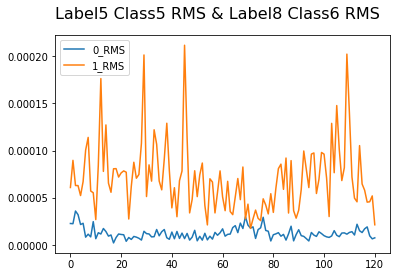

In [18]:
#MAV and RMS
Features.plot(y=['0_MAV', '1_MAV'])
plt.suptitle('Label5 Class5 MAV vs Label8 Class6 MAV ', fontsize=16)
Features.plot(y=['0_RMS', '1_RMS'])
plt.suptitle('Label5 Class5 RMS & Label8 Class6 RMS', fontsize=16)

Text(0.5, 0.98, 'Label5 Class5 MFCC vs Label8 Class6 MFCC ')

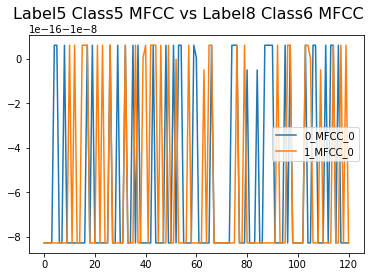

In [19]:
#MFCC
Features.plot(y=['0_MFCC_0','1_MFCC_0'])
plt.suptitle('Label5 Class5 MFCC vs Label8 Class6 MFCC ', fontsize=16)


In [20]:
#Slope and variance
Features.plot(y=['0_Slope', '1_Slope'])
plt.suptitle('Label5 Class5 slope vs Label8 Class6 slope', fontsize=16)
Features.plot(y=['0_VAR', '1_VAR'])
plt.suptitle('Label5 Class5 var vs Label8 Class6 var', fontsize=16)

Text(0.5, 0.98, 'Label5 Class5 var vs Label8 Class6 var')

Text(0.5, 0.98, ' Label5 Class5 cross vs Label8 Class6 spectral slope')

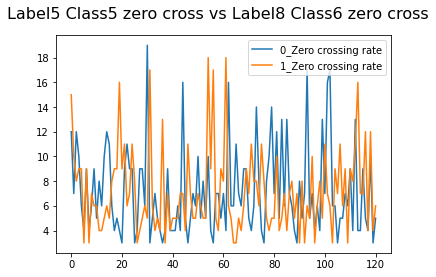

In [21]:
#Spectral slope and Zero crossing
Features.plot(y = ['0_Zero crossing rate', '1_Zero crossing rate'])
plt.suptitle('Label5 Class5 zero cross vs Label8 Class6 zero cross', fontsize=16)
Features.plot(y=['0_Spectral slope', '1_Spectral slope'])
plt.suptitle(' Label5 Class5 cross vs Label8 Class6 spectral slope', fontsize=16)